In [16]:
#import important libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [17]:
#importing the dataset
data = pd.read_excel("data2.xlsx")
data.head()

,AD,R,E,T
0,437.086107,2040.288035,70,2
1,955.642876,3761.475756,54,5
2,758.794548,2884.905020,32,9
3,638.792636,2758.107970,82,7
4,240.416776,1633.378851,69,8


In [18]:
X = data[['AD','E', 'T']] #independent variables
Y = data['R'] #dependent data


In [19]:
#Splitting the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,Y , test_size = 0.2, random_state=42)


In [20]:
#calling the model
LR_model = LinearRegression()

In [21]:
#fitting the model
LR_model.fit(X_train, y_train)
print('Training model status : COMPLETED')

Training model status : COMPLETED


In [22]:
#predicting 
y_pred = LR_model.predict(X_test)

#evaluating the model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error(MSE):", mse)
print(f"R2 score:", r2)

Mean Squared Error(MSE): 2842.554725318245
R2 score: 0.9956536868667452


In [23]:
#get the intercept and slope coefficient

print("\nModel Coefficients")
for i, col in enumerate(X.columns):
    print(f"{col}: {LR_model.coef_[i]}")

print("Intercept (a):", LR_model.intercept_)


Model Coefficients
AD: 3.01400947948276
E: 5.094474237606576
T: 2.6768250104342597
Intercept (a): 485.37796647089135


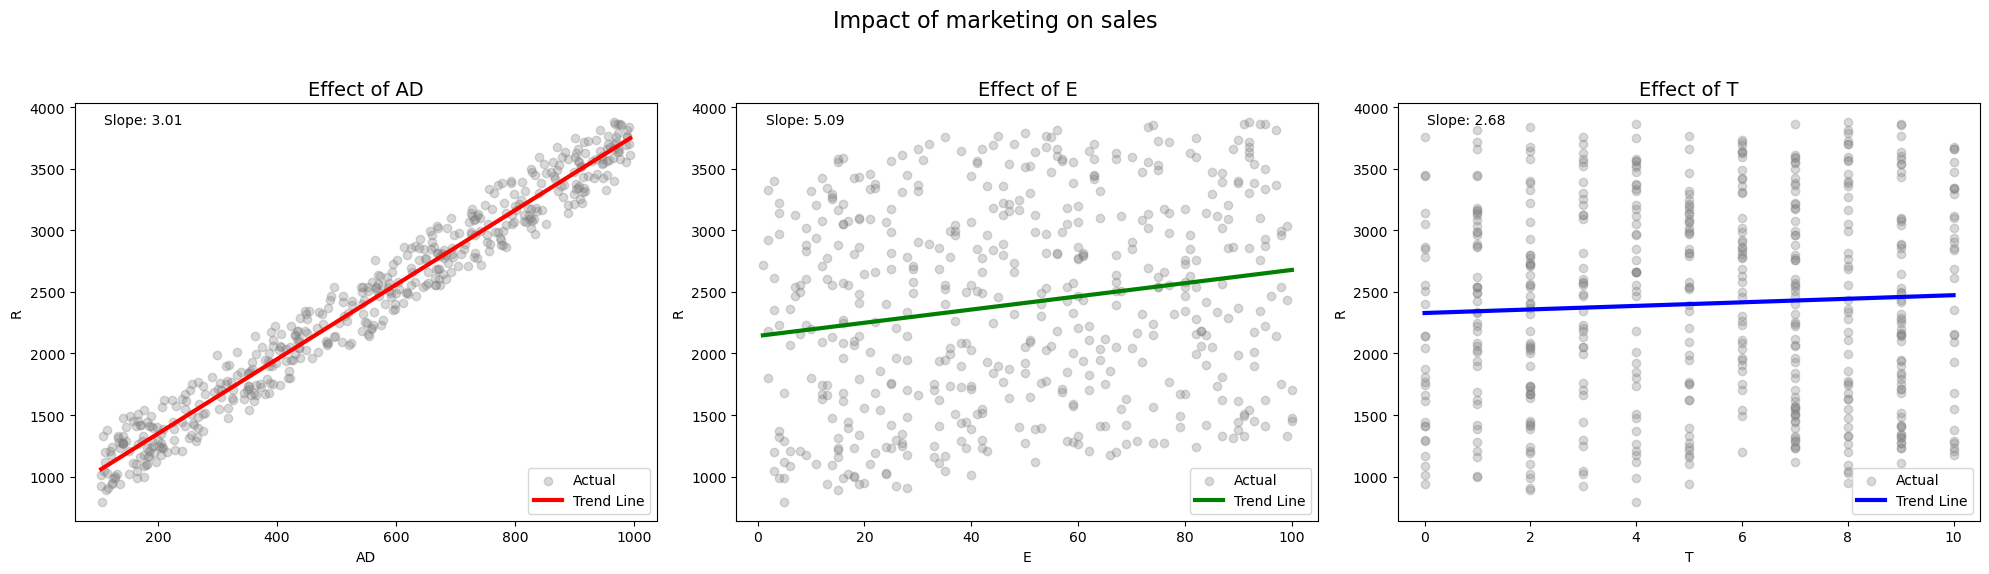

In [32]:
#Plotting the graph
features = ['AD', 'E', 'T']
target = 'R'

fig, axes = plt.subplots(1,3, figsize=(20,6))

colors = ['red','green','blue']

for i, col in enumerate(features):
    axes[i].scatter(data[col],data[target], color='gray', alpha=0.3, label='Actual')
    x_sort = data[[col]].sort_values(by=col)

    z= np.polyfit(data[col],data[target],1)
    p = np.poly1d(z)
    axes[i].plot(x_sort, p(x_sort), color=colors[i], linewidth=3, label='Trend Line')

    axes[i].set_title(f'Effect of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)

    slope = LR_model.coef_[i]
    axes[i].text(0.05, 0.95, f'Slope: {slope:.2f}', transform=axes[i].transAxes)
    axes[i].legend()

plt.suptitle('Impact of marketing on sales', fontsize = 16)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [33]:
#training the model on the final data set
final_model = LinearRegression()

#training on the entire dataset
final_model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
#Saving the model

model_filename = "final_multilinear_regression_model.joblib"
joblib.dump(final_model, model_filename)
print(f"Model saveed as {model_filename}")

Model saveed as final_multilinear_regression_model.joblib
